# Задание 1

In [207]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
from math import pi, sqrt

In [208]:
def f(x, a):
    x = np.asarray(x, dtype = float)
    a_0 = a[0]
    a = np.asarray(a[1:], dtype = float)
    res = 1/(np.exp(a_0 + np.dot(x, a)) + 1)
    return res

def f_obj(a, f, X, y):
    n = len(y)
    return np.sum(np.square([(f(X[i], a) - y[i]) for i in range(n)]))

In [209]:
data = np.load('data_89.npz')
y = data['y2']
X = data['A2']
n = np.shape(X)[1]
a0 = np.random.random(size = len(X[0]) + 1)
a_min = minimize(f_obj, a0, args = (f, X, y)).x
print('Вектор а_min, где целлевая функция f_obj минимальная:\n', a_min)
print('f_obj(a_min)=', "%.5f" % f_obj(a_min, f, X, y),' < ', 
      "%.5f" % f_obj(a_min + 0.01, f, X, y), '=f_obj(a_min + 0.01)', sep = '')
print('f_obj(a_min - 0.01)=', "%.5f" % f_obj(a_min + 0.01, f, X, y),' > ',
      "%.5f" % f_obj(a_min, f, X, y), '=f_obj(a_min)', sep = '')

Вектор а_min, где целлевая функция f_obj минимальная:
 [ 0.58419754  0.32174933 -0.11369635  1.99877873 -0.31961172 -0.28386644
 -0.35980961 -0.02177467  0.00974514  1.53320617 -0.59544787]
f_obj(a_min)=0.04355 < 0.04392=f_obj(a_min + 0.01)
f_obj(a_min - 0.01)=0.04392 > 0.04355=f_obj(a_min)


# Задание 2

In [210]:
def deriv(fun, x_prev, f, X, y, i, h):
    a_n = np.copy(x_prev)
    a_n[i] = a_n[i] + h
    f0 = fun(x_prev, f, X, y)
    f1 = fun(a_n, f, X, y)
    df = f1 - f0
    return df / h

def antigrad(fun, x_prev, f, X, y):
    grad = np.asarray([deriv(fun, x_prev, f, X, y, i, h = 0.0000001) 
                        for i in range(len(x_prev))], dtype=float)
    return -1 * grad

def grad_boost(fun, f, X, y, a0, gamma = 0.01):
    x_next = a0
    eps = 0.0001
    i = 0
    while True:
        x_prev = x_next
        x_next = x_prev + gamma * antigrad(fun, x_prev, f, X, y)
        if (abs(fun(x_next, f, X, y) - fun(x_prev, f, X, y)) <= eps) or (i >= 1000):
            break
        i += 1
    a_min = x_next
    return a_min, i


In [221]:
a0 = np.random.random(size = len(X[0]) + 1)
gamma = 0.7
a_min, Nit = grad_boost(f_obj, f, X, y, a0, gamma = gamma)
print('gamma =', gamma, 'Nit = ', Nit)
print('a_min = ', a_min)
print('f_obj(a_min) = %.5f' %f_obj(a_min, f, X, y))

gamma = 0.7 Nit =  29
a_min =  [ 0.54019803  0.32107743 -0.05555437  1.87860987 -0.2811676  -0.26294622
 -0.3297889  -0.05707854  0.03428188  1.48343942 -0.55489206]
f_obj(a_min) = 0.04431


# Задание 3

In [222]:
def ksi_arr(lambd = 0.5, n = 1000):
    gamma = np.random.random(n)
    ksi = np.log(gamma) / -lambd
    return ksi

In [223]:
def f(x, lambd = 0.5):
    return lambd * np.exp(-lambd*x)

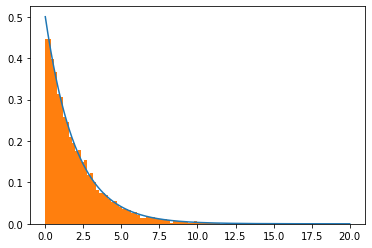

In [224]:
N = 10000
l = 0.5
ksi = ksi_arr(lambd = l, n = N)
X = np.linspace(0, 20, N)
Y = f(X, l)

n_bins = np.sqrt(N).astype(int)
plt.plot(X, Y)
plt.hist(ksi, bins = n_bins, density = True)
plt.show()

По гистограмме видно, что плостность распределения смоделированной величины соответствует реальной плотности
Смоделируем величину с меньшей выборкой:

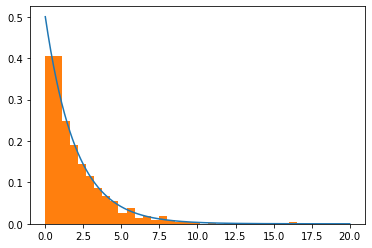

In [225]:
N = 1000
l = 0.5
ksi = ksi_arr(lambd = l, n = N)
X = np.linspace(0, 20, N)
Y = f(X, l)

n_bins = np.sqrt(N).astype(int)
plt.plot(X, Y)
plt.hist(ksi, bins = n_bins, density = True)
plt.show()

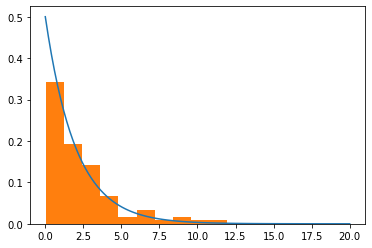

In [229]:
N = 100
l = 0.5
ksi = ksi_arr(lambd = l, n = N)
X = np.linspace(0, 20, N)
Y = f(X, l)

n_bins = np.sqrt(N).astype(int)
plt.plot(X, Y )
plt.hist(ksi, bins = n_bins, density = True)
plt.show()

Проверка гипотезы об экспотенциальном распределении

In [231]:
N = 10000
l = 0.5
ksi = ksi_arr(lambd = l, n = N)
X = np.linspace(0, 20, N)
Y = f(X, l)

num_steps = np.ceil(np.power(N, 1/3)).astype(int)
step = (10 - 0) / num_steps
ksi = np.sort(ksi)
Y = np.sort(Y)
intervals = np.arange(0, 10, step)
pred_E = np.histogram(ksi, bins=intervals, density = True)[0]
real_E = np.asarray([integrate.quad(f, intervals[i], intervals[i + 1])[0] 
                          for i in range(num_steps - 1)])
xi = np.sum([((real_E[j] - pred_E[j])**2)/real_E[j] for j in range(num_steps - 1)])
print('Число степеней свободы:', len(real_E) - 1, 'Найденное значение кси-квадрат %.2f ' % xi)
print('Из таблицы, значение кси-квадрат с 20 степенью свобод и уровнем значимости 0.95: 31,4104')
print('Полученное значени кси-квадрат меньше табличного, значит гипотеза об экспотенциальном распределении принимается')
print('p-value для кси-квадрат = 1.48 и 20 степенями свободы равно 0.999 => частоты очень хорошо согласуются')

Число степеней свободы: 20 Найденное значение кси-квадрат 1.48 
Из таблицы, значение кси-квадрат с 20 степенью свобод и уровнем значимости 0.95: 31,4104
Полученное значени кси-квадрат меньше табличного, значит гипотеза об экспотенциальном распределении принимается
p-value для кси-квадрат = 1.48 и 20 степенями свободы равно 0.999 => частоты очень хорошо согласуются


Проверяем наши вычисления библиотечной функцией:

In [232]:
from scipy.stats import chisquare
print((chisquare(pred_E, real_E)))

Power_divergenceResult(statistic=1.4833428056373508, pvalue=0.9999999929143507)


# Задание 4

In [233]:
def ksinorm_arr(n = 1000):
    gamma = np.random.random(n)
    phi = 2 * pi * np.random.random(n)
    r = np.sqrt(-2 * np.log(gamma))
    ksi = r * np.cos(phi)
    return ksi

def fnorm(x):
    return np.exp((-x**2)/2)/sqrt(2 * pi)

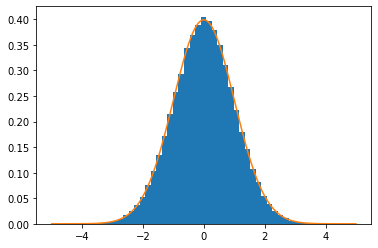

In [234]:
N = 100000

ksi = ksinorm_arr(n = N)
X = np.linspace(-5, 5, N)
Y = fnorm(X)

n_bins = np.power(N, 1/3).astype(int)
plt.hist(ksi, bins = n_bins, density = True)
plt.plot(X, Y)
plt.show()

Проверка гипотезы о нормальном распределении

In [235]:
N = 50000
l = 0.5
ksi = ksinorm_arr(n = N)
X = np.linspace(-3, 3, N)
Y = fnorm(X)

num_steps = np.ceil(np.power(N, 1/3)).astype(int)
step = (3 - (-3)) / num_steps
ksi = np.sort(ksi)
Y = np.sort(Y)
intervals = np.arange(-3, 3, step)
pred_E = np.histogram(ksi, bins=intervals, density = True)[0]
real_E = np.asarray([integrate.quad(fnorm, intervals[i], intervals[i + 1])[0] 
                          for i in range(num_steps - 1)])
xi = np.sum([((real_E[j] - pred_E[j])**2)/real_E[j] for j in range(num_steps - 1)])
print('Число степеней свободы:', len(real_E) - 1, 'Найденное значение кси-квадрат %.1f ' % xi)
print('Из таблицы, значение кси-квадрат с 35 степенью свобод и уровнем значимости 0.95: 49.8018')
print('Полученное значени кси-квадрат меньше табличного, значит гипотеза об экспотенциальном распределении принимается')
print('p-value для кси-квадрат = 26.9 и 35 степенями свободы равно 0,8348 => частоты очень хорошо согласуются')

Число степеней свободы: 35 Найденное значение кси-квадрат 26.9 
Из таблицы, значение кси-квадрат с 35 степенью свобод и уровнем значимости 0.95: 49.8018
Полученное значени кси-квадрат меньше табличного, значит гипотеза об экспотенциальном распределении принимается
p-value для кси-квадрат = 26.9 и 35 степенями свободы равно 0,8348 => частоты очень хорошо согласуются


Проверяем наши вычисления библиотечной функцией:

In [236]:
from scipy.stats import chisquare
print((chisquare(pred_E, real_E)))

Power_divergenceResult(statistic=26.857168473499268, pvalue=0.8363447325732607)


# Задание 5

In [237]:
def f_vec(x):
    return 1 / (1 + np.sum(np.square(x)))

In [238]:
A = np.asarray(data['A4'])
L = np.linalg.eigh(A)[0]
n = len(L)
sigm = 1 / (2 * L)
nu = np.zeros(n)
N = 1000000
print('Посчитаем интеграл 5 раз для N = %d' % N)
for j in range(5):
    sum = 0
    for i in range(N):
        xvec = np.random.normal(loc = nu, scale = sigm, size = n)
        sum += f_vec(xvec)
    integral = np.prod(np.sqrt(2 * pi * sigm)) * (sum / N)
    print(integral)

Посчитаем интеграл 5 раз для N = 1000000
0.42957587608706554
0.42939019011606083
0.42920016035258196
0.42908631527784696
0.4291571674484542


In [239]:
N = 10000
print('Посчитаем интеграл 5 раз для N = %d' % N)
for j in range(5):
    sum = 0
    for i in range(N):
        xvec = np.random.normal(loc = nu, scale = sigm, size = n)
        sum += f_vec(xvec)
    integral = np.prod(np.sqrt(2 * pi * sigm)) * (sum / N)
    print(integral)

Посчитаем интеграл 5 раз для N = 10000
0.42658010101935884
0.43620141112860283
0.43141343279690286
0.4292905748066346
0.4312036504667951


# Задание 6

In [240]:
def gauss_4(A, B):
    a = np.asarray([0.8611363116, 0.3399810436, -0.3399810436, -0.8611363116])
    w = np.asarray([0.3478548451/2, 0.6521451549/2, 0.6521451549/2, 0.3478548451/2])
    x = (B - A)*a / 2 + (B + A) / 2
    return x, w

def phi_real(x):
    return 10*np.sqrt(x)

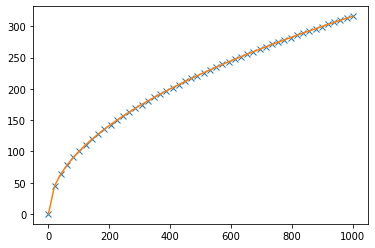

In [241]:
y, w = gauss_4(0, 1)
M = np.empty((4,4))
N = 50
for i in range(4):
    for j in range(4):
        if i == j:
            M[i][j] = (1 - w[j]*sqrt(y[i]*y[j]))
        else:
            M[i][j] = -1 * w[j]*sqrt(y[i]*y[j])
S = 5*np.sqrt(y)
Y = np.linalg.solve(M, S)
Phi = lambda x: np.sum([w[i]*np.sqrt(x)*np.sqrt(y[i])*Y[i] for i in range(4)]) + 5 * np.sqrt(x)
X = np.linspace(0, 1000, N)
Phi_est = np.asarray([Phi(x) for x in X])
plt.plot(X, Phi_est, 'x')
plt.plot(X, phi_real(X), '-')